# Manzanas

## 1. Configuración del entorno

En este apartado se cargan las librerias correspondientes para poder graficar y generar el modelo de IA, como se logra observar, se usara pandas, numpy, matplotlib, seaborn, sklearn.

In [316]:
# Install dependencies as needed:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Imports de sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, classification_report, confusion_matrix, f1_score, precision_score, roc_auc_score, roc_curve


Aquí se carga el dataset, el cual es necesario para poder generar el entrenamiento y testeo del modelo.

In [317]:
# Load the data
data = pd.read_csv('apples.csv')

# Print the first few rows of the data
print(data.head())

   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good  


## 2. Analisis del dataset

In [318]:
# Análisis exploratorio de datos (EDA)
data.info() 
# Brinda estadisticas descriptivas de los datos 
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


A_id         Size       Weight    Sweetness  Crunchiness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1999.500000    -0.503015    -0.989547    -0.470479     0.985478   
std    1154.844867     1.928059     1.602507     1.943441     1.402757   
min       0.000000    -7.151703    -7.149848    -6.894485    -6.055058   
25%     999.750000    -1.816765    -2.011770    -1.738425     0.062764   
50%    1999.500000    -0.513703    -0.984736    -0.504758     0.998249   
75%    2999.250000     0.805526     0.030976     0.801922     1.894234   
max    3999.000000     6.406367     5.790714     6.374916     7.619852   

         Juiciness     Ripeness  
count  4000.000000  4000.000000  
mean      0.512118     0.498277  
std       1.930286     1.874427  
min      -5.961897    -5.864599  
25%      -0.801286    -0.771677  
50%       0.534219     0.503445  
75%       1.835976     1.766212  
max       7.364403     7.237837

## 3. Elección de features

Como se logra observar, debido a que dos datos son tomados como tipo object, estos no se ven representados en las gráficas anteriores. Por ende es necesario trabajarlos para poder representarlos y utilizarlos.

In [319]:
# Convierte la columna Acidity 
data["Acidity"] = pd.to_numeric(data["Acidity"], errors='coerce') 
data = data.dropna()

# Codificar Quality
data["Quality"] = data["Quality"].replace({"good": 1, "bad": 0})

# Create a copy of the data for manipulation
data_copy = data.copy()

# Drop ID
data.drop(columns=['A_id'], inplace=True)
    

C:\Users\ncque\AppData\Local\Temp\ipykernel_37244\2501345145.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Quality"] = data["Quality"].replace({"good": 1, "bad": 0})


Como se acaba de observar, se modificaron los valores para poder ser leídos correctamente por las diferentes graficas y posteriormente para su uso en el modelo. Las decisiones tomadas fueron las siguientes:
1. Se convirtieron los valores de "Acidity" en numericos para lograr que este sea leído correctamente.
2. Se eliminaron los datos que poseían datos vacíos. 
3. Se cambió el valor de good y bad a 1 = good y 0  = bad para poder representarlo en graficas y además para su posterior uso en el modelo

Ahora con los datos modificados, obtenemos las siguientes graficas:

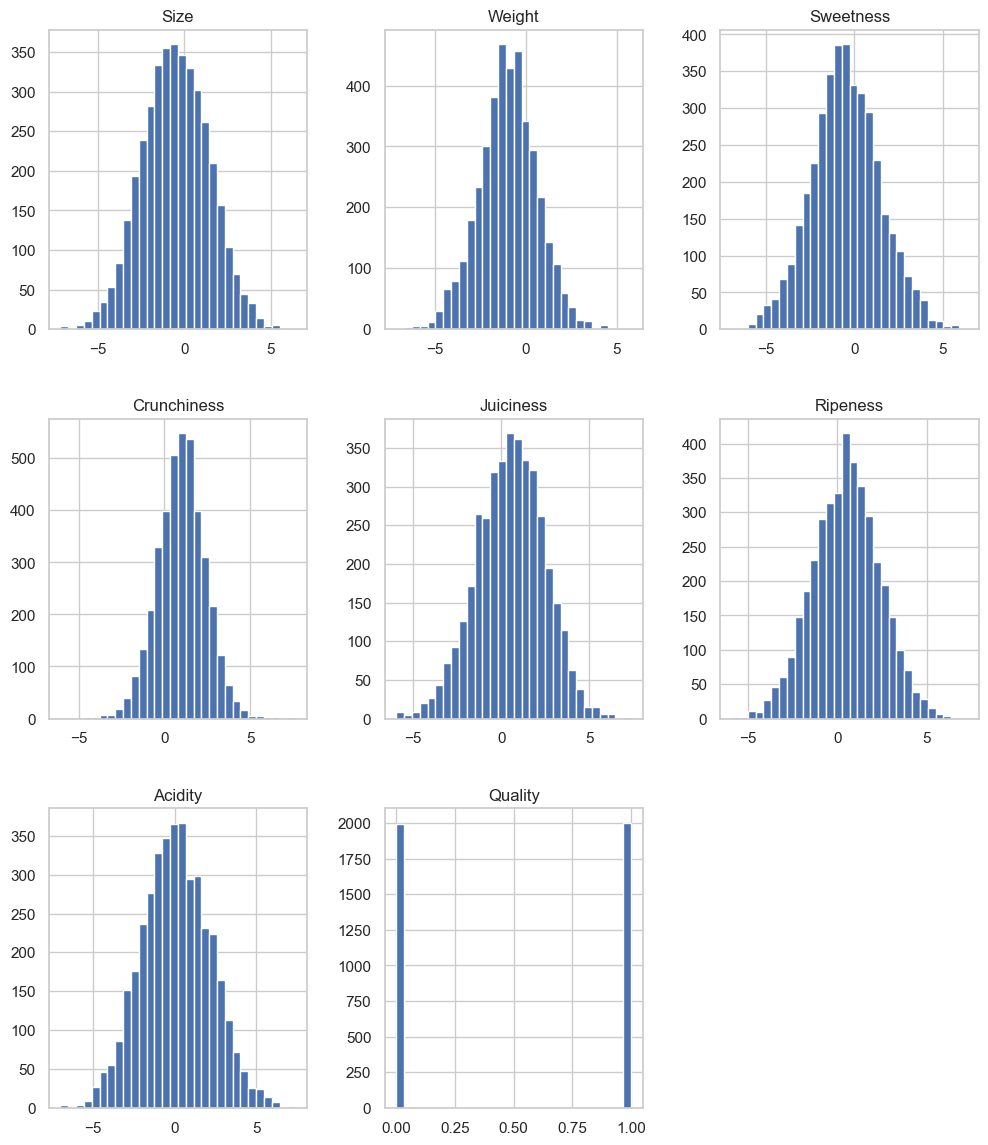

In [320]:
data.hist(figsize=(12, 14), bins=30) # histograma de los datos para ver la distribucion de los datos en cada columna de la data 
plt.show() # muestra el histograma de los datos 

Podemos observar buenas distribuciones de los datos, todos formando una campana de gaussiana, lo que nos indica que los datos están bien distribuidos y poseen pocos outliers.

### 3.1 Manejo de valores atipicos

In [321]:
# Definir función para detectar valores atípicos con IQR
def detectar_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
    return outliers


# Aplicar la función al dataset
outliers = detectar_outliers_iqr(data.select_dtypes(include=[np.number]))
print("Outliers detected:")
print(outliers.sum())  # Cantidad de valores atípicos por variable

# Eliminar valores atípicos
data = data[~outliers.any(axis=1)]  # Eliminar filas con al menos un valor atípico

print("\nDataFrame shape after removing outliers:")
print(data.shape)  # Verificar la forma del nuevo DataFrame

Outliers detected:
Size           22
Weight         54
Sweetness      32
Crunchiness    47
Juiciness      32
Ripeness       24
Acidity        20
Quality         0
dtype: int64

DataFrame shape after removing outliers:
(3790, 8)


### 3.2 Analisis de Correlación

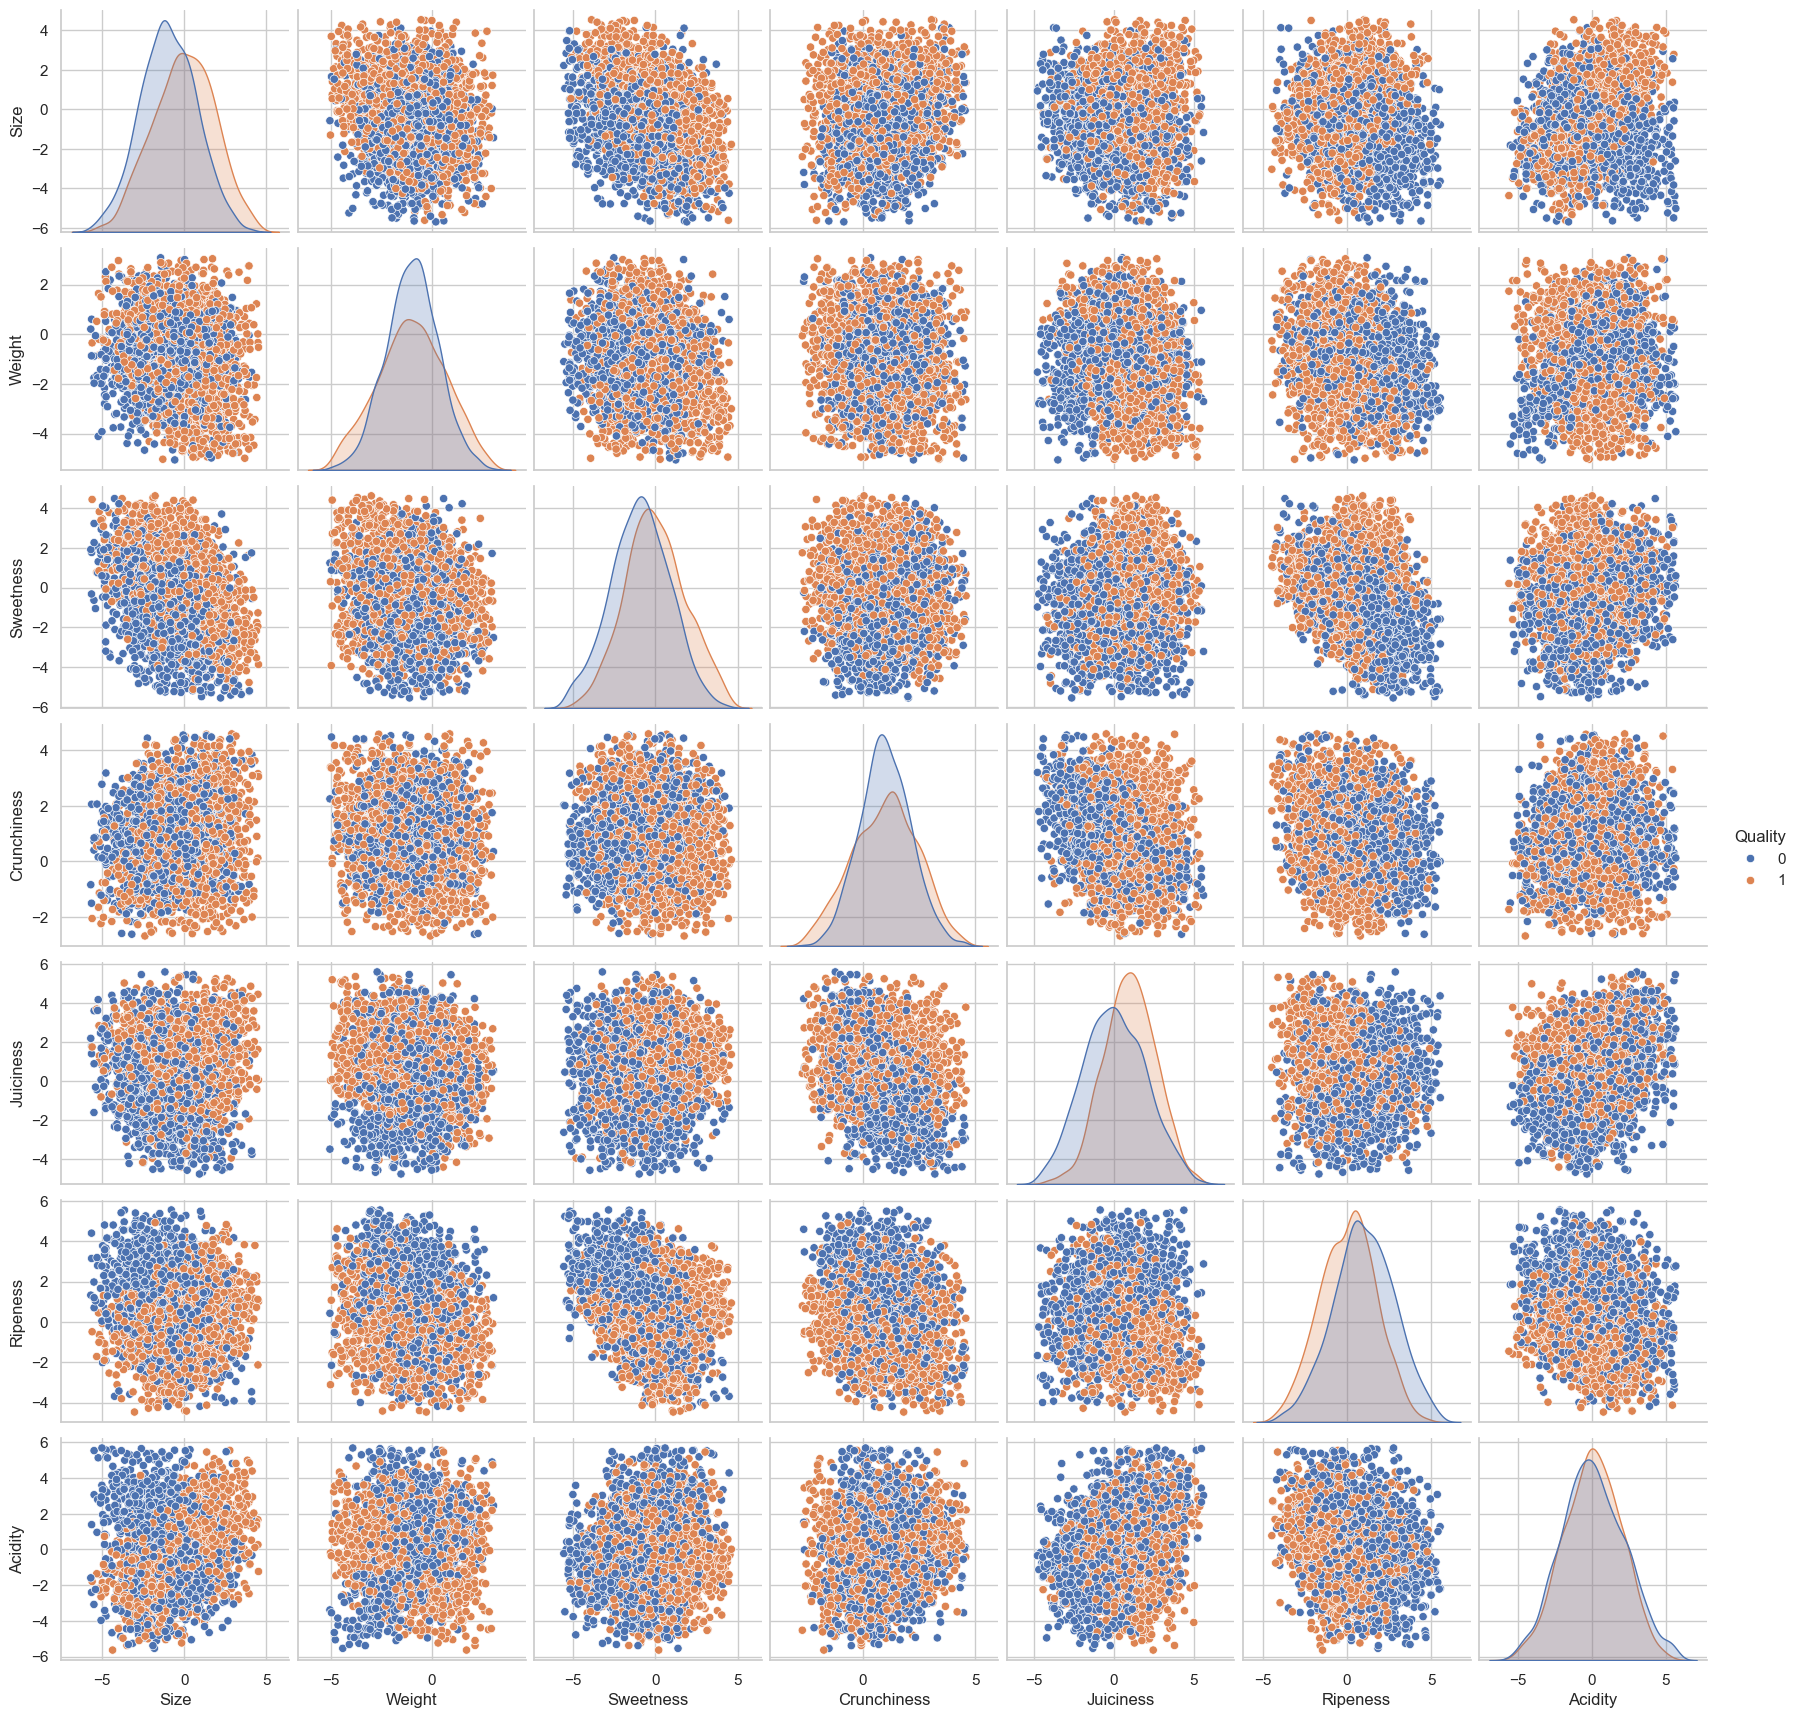

In [322]:
sns.pairplot(data, diag_kind='kde', hue='Quality') # Muestra la relación entre las variables

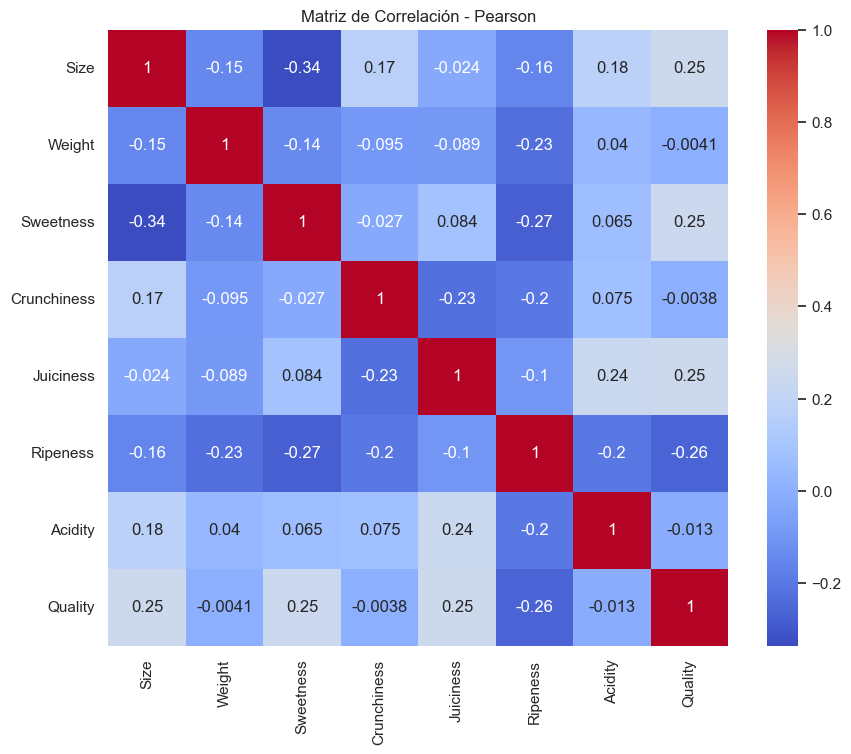

In [323]:
correlation_matrix = data.corr(method="pearson")  # o method="spearman"
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación - Pearson')
plt.show()

Tras identificar variables altamente correlacionadas ( con un coeficiente mayor a 0.8 o menor a -0.8) podemos decir lo siguiente:

- Ninguna variables tiene una correlacion extrema con otra
- Hay multiples variables con buena correlacion al Quality, lo que nos indica que el modelo puede ser capaz de predecir la calidad de la manzana con buena efectividad. Entre estas variables se encuentran:
    - Size
    - Sweetness
    - Juiciness
    - Ripeness
- El resto de las variables no tienen una correlacion tan alta, pero si poseen una correlacion moderada.


## 4. División del Dataset

Es necesario saber como estan distribuidos los datos, para poder repartir equitativamente los datos para el training y testing del modelo

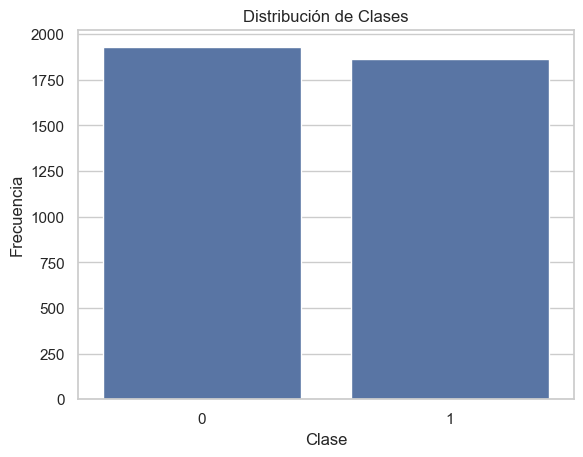

In [324]:
# Visualización estadística da la distribución de las clases
sns.countplot(x='Quality', data=data)
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()

In [325]:
# Función para evaluar modelos
def evaluate_model(X_test, y_test, model, threshold=0.5, cmap='Blues'): 
    # Predecir probabilidades
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Ajustar el umbral de decisión
    y_test_pred = (y_prob >= threshold).astype(int)
    
    # Evaluar el modelo en el conjunto de prueba
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    print("📊 Evaluación")
    print("--------------------------------")
    print(f"✅ Precisión (Precision):     {precision:.2f}")
    print(f"🔁 Sensibilidad (Recall):     {recall:.2f}")
    print(f"🎯 F1-Score:                  {f1:.2f}")
    print("\n📊 Classification Report:")
    print(classification_report(y_test, y_test_pred))
    print("--------------------------------")
    # Visualizar la matriz de confusión para prueba
    print("🧮 Matriz de Confusión:")
    cm_test = confusion_matrix(y_test, y_test_pred)
    cm_test_df = pd.DataFrame(cm_test, index=['Mala', 'Buena'], columns=['Predicted Mala', 'Predicted Buena'])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_test_df, annot=True, fmt='d', cmap=cmap)
    plt.title('Matriz de Confusión - Prueba')
    plt.xlabel('Predicción')
    plt.ylabel('Realidad')
    plt.show()

### 4.1 Normalización VS Estandarización

A continuación se hace una breve comparación entre normalización y estandarización, para poder decidir que método utilizar en el modelo. 

In [326]:
# Definir features y target
X = data.drop('Quality', axis=1)
y = data["Quality"]

# Datos usando estandarización (StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Datos usando normalización (MinMaxScaler)

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Dividir el dataset en entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_normalized, y, test_size=0.3, random_state=42, stratify=y)

In [327]:
# Entrenar el modelo de regresión logística
rl_model_s = LogisticRegression(max_iter=1000)
rl_model_s.fit(X_train_s, y_train_s)

rl_model_n = LogisticRegression(max_iter=1000)
rl_model_n.fit(X_train_n, y_train_n)


LogisticRegression(max_iter=1000)

In [328]:
# Entrenar el modelo KNN
knn_model_s = KNeighborsClassifier(n_neighbors=10)
knn_model_s.fit(X_train_s, y_train_s)

knn_model_n = KNeighborsClassifier(n_neighbors=10)
knn_model_n.fit(X_train_n, y_train_n)

KNeighborsClassifier(n_neighbors=10)

Evaluación del modelo de regresión logística (escalado):
📊 Evaluación
--------------------------------
✅ Precisión (Precision):     0.71
🔁 Sensibilidad (Recall):     0.75
🎯 F1-Score:                  0.73

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.71      0.73       578
           1       0.71      0.75      0.73       559

    accuracy                           0.73      1137
   macro avg       0.73      0.73      0.73      1137
weighted avg       0.73      0.73      0.73      1137

--------------------------------
🧮 Matriz de Confusión:


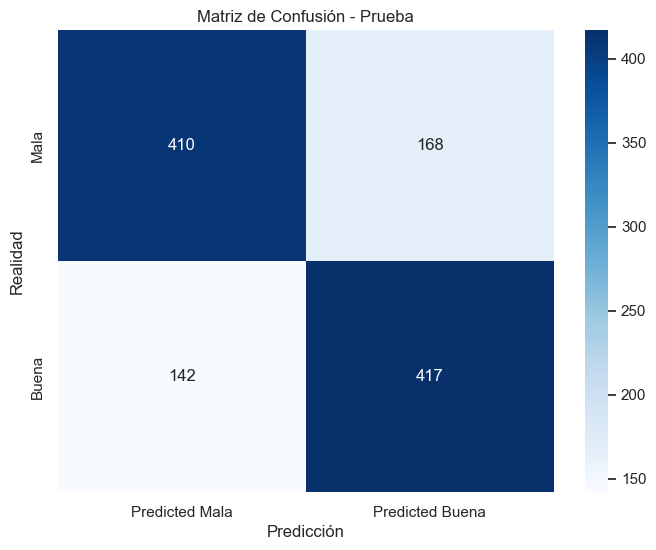

Evaluación del modelo de regresión logística (normalizado):
📊 Evaluación
--------------------------------
✅ Precisión (Precision):     0.71
🔁 Sensibilidad (Recall):     0.75
🎯 F1-Score:                  0.73

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.71      0.73       578
           1       0.71      0.75      0.73       559

    accuracy                           0.73      1137
   macro avg       0.73      0.73      0.73      1137
weighted avg       0.73      0.73      0.73      1137

--------------------------------
🧮 Matriz de Confusión:


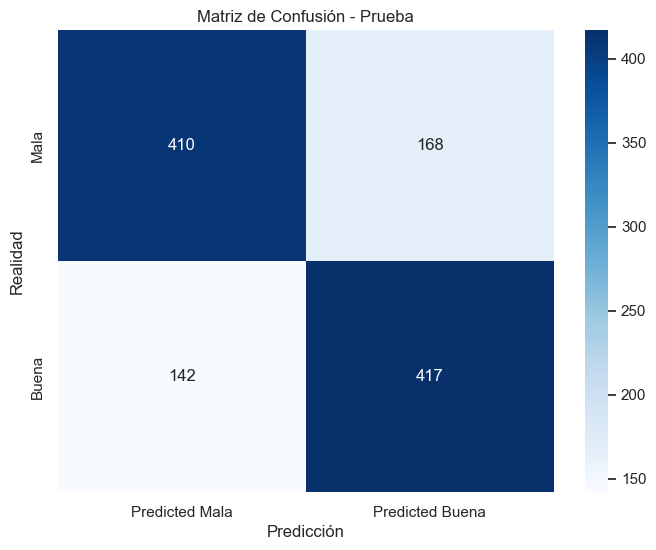

Evaluación del modelo KNN (escalado):
📊 Evaluación
--------------------------------
✅ Precisión (Precision):     0.86
🔁 Sensibilidad (Recall):     0.92
🎯 F1-Score:                  0.89

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.89       578
           1       0.86      0.92      0.89       559

    accuracy                           0.89      1137
   macro avg       0.89      0.89      0.89      1137
weighted avg       0.89      0.89      0.89      1137

--------------------------------
🧮 Matriz de Confusión:


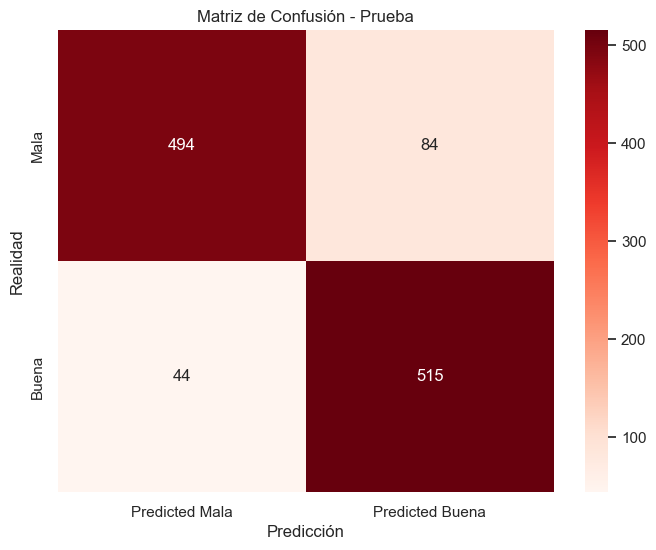

Evaluación del modelo KNN (normalizado):
📊 Evaluación
--------------------------------
✅ Precisión (Precision):     0.86
🔁 Sensibilidad (Recall):     0.92
🎯 F1-Score:                  0.89

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       578
           1       0.86      0.92      0.89       559

    accuracy                           0.89      1137
   macro avg       0.89      0.89      0.89      1137
weighted avg       0.89      0.89      0.89      1137

--------------------------------
🧮 Matriz de Confusión:


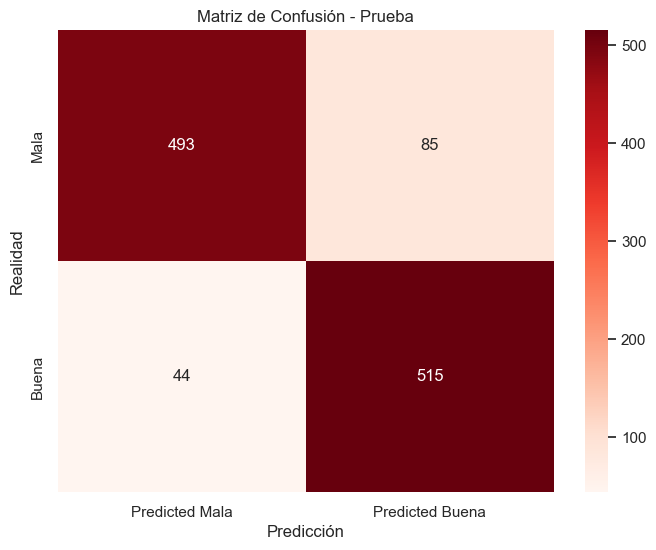

In [329]:
# Evaluar el modelo de regresión logística
print("Evaluación del modelo de regresión logística (escalado):")
evaluate_model(X_test_s, y_test_s, rl_model_s, cmap='Blues')
print("Evaluación del modelo de regresión logística (normalizado):")
evaluate_model(X_test_n, y_test_n, rl_model_n, cmap='Blues')

# Evaluar el modelo KNN
print("Evaluación del modelo KNN (escalado):")
evaluate_model(X_test_s, y_test_s, knn_model_s, cmap='Reds')
print("Evaluación del modelo KNN (normalizado):")
evaluate_model(X_test_n, y_test_n, knn_model_n, cmap='Reds')


No se observa una diferencia entre ambos métodos, por lo que se decide utilizar normalización.

In [330]:
# Eleccion del mejor dataset
y_test = y_test_n
y_train = y_train_n
X_train = X_train_n
X_test = X_test_n

## 5. Ajuste de los Modelos

A continuación se experimentan diferentes combinaciones de modelos y se comparan los resultados obtenidos, para poder elegir el mejor modelo para el dataset.

### 5.1. Ajuste de Hiperparámetros para Regresión Logística

Empezamos con la regresión logística, se realiza un ajuste de hiperparámetros para poder obtener el mejor modelo posible. Se utiliza GridSearchCV para encontrar los mejores hiperparámetros y se entrena el modelo con estos valores.

Utilizaremos los siguientes hiperparámetros para el ajuste:
- **C**: Inverso de la fuerza de regularización. Debe ser un valor positivo. La regularización ayuda a prevenir el sobreajuste.
- **penalty***: Tipo de regularización a utilizar. Puede ser 'l1', 'l2'. La regularización L1 puede llevar a soluciones esparsas, mientras que la L2 tiende a distribuir el peso entre todas las características.
- **solver**: Algoritmo a utilizar para optimizar la función de costo. Puede ser 'liblinear', 'saga', 'newton-cg', 'lbfgs'. Algunos solvers son más adecuados para conjuntos de datos grandes, mientras que otros son más eficientes para conjuntos de datos pequeños.
- **max_iter**: Número máximo de iteraciones para el algoritmo de optimización. Un valor más alto puede ser necesario para conjuntos de datos grandes o complejos.

In [331]:
# Definición del modelo base
log_reg = LogisticRegression()

# Definición del grid de hiperparámetros
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs'],
    'max_iter': [100, 200, 500],
}

# Configuración de GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1, return_train_score=True)

# Entrenamiento
grid_search.fit(X_train, y_train)

# Guardar resultados de la búsqueda
lr_results = pd.DataFrame(grid_search.cv_results_)

# Mejor combinación de hiperparámetros
print("Best Parameters:", grid_search.best_params_)

# Evaluación con el mejor modelo
best_rl_model = grid_search.best_estimator_
best_rl_model.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


c:\Users\ncque\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ncque\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ncque\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ncque\AppD

LogisticRegression(C=1)

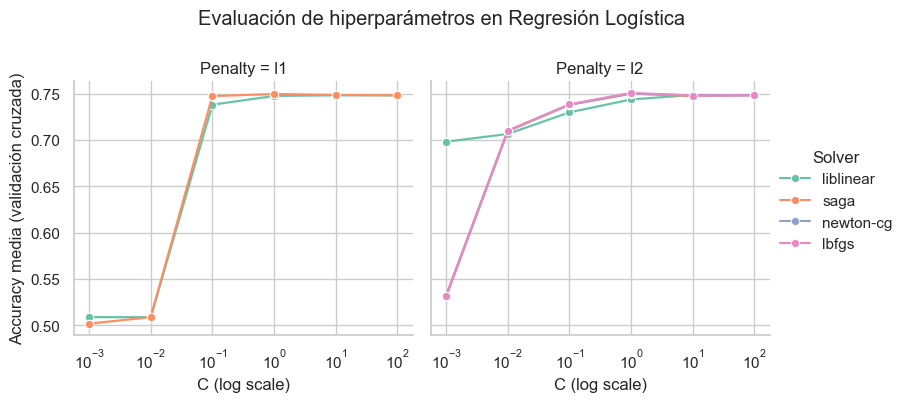

In [332]:
# Asegurarse de que los valores estén en el tipo correcto
lr_results['param_C'] = lr_results['param_C'].astype(float)
lr_results['param_max_iter'] = lr_results['param_max_iter'].astype(int)

# Crear FacetGrid: uno por cada valor de penalty
g = sns.FacetGrid(
    lr_results,
    col='param_penalty',
    hue='param_solver',
    col_wrap=2,
    height=4,
    sharey=True,
    palette='Set2'
)

# Gráfico de líneas: C vs mean_test_score
g.map(sns.lineplot, 'param_C', 'mean_test_score', marker='o')

# Escala logarítmica en eje X (porque C varía mucho)
for ax in g.axes.flat:
    ax.set_xscale('log')

# Títulos y etiquetas
g.set_titles('Penalty = {col_name}')
g.set_axis_labels('C (log scale)', 'Accuracy media (validación cruzada)')
g.add_legend(title='Solver')
plt.subplots_adjust(top=0.8)
g.figure.suptitle('Evaluación de hiperparámetros en Regresión Logística')
plt.show()

El GridSearchCV nos dio como resultado los siguientes hiperparámetros:
- **C**: 1
- **max_iter**: 100
- **penalty**: l2
- **solver**: lbfgs





Adicionalmente se realizan pruebas con diferentes umbrales de probabilidad para obtener el mejor modelo posible.

C:\Users\ncque\AppData\Local\Temp\ipykernel_37244\2622664692.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  threshold_results = pd.concat([threshold_results, new_row], ignore_index=True)


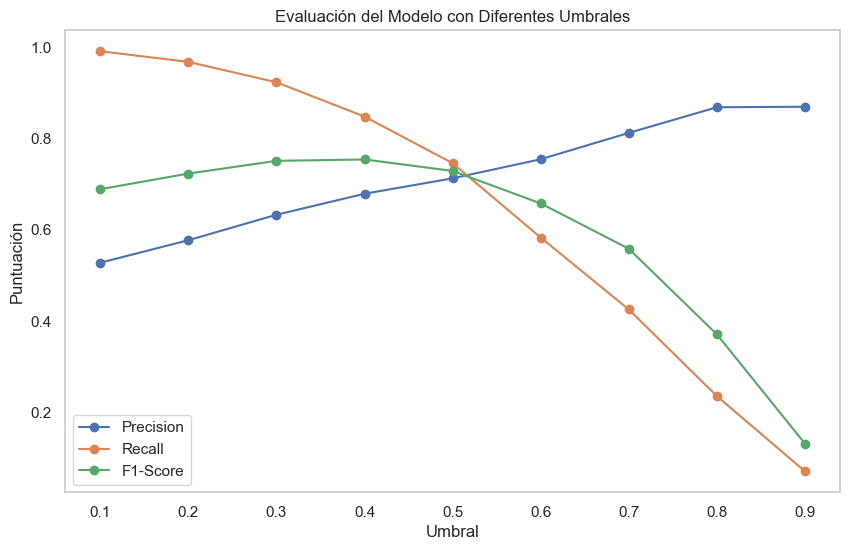

In [333]:
# Evaluación con el mejor modelo con diferentes umbrales
thresholds =  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

threshold_results = pd.DataFrame(columns=['Threshold', 'Precision', 'Recall', 'F1-Score'])

for threshold in thresholds:
    y_test_pred = (best_rl_model.predict_proba(X_test)[:, 1] >= threshold).astype(int)
    
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    # Crear un nuevo DataFrame con los resultados y concatenarlo
    new_row = pd.DataFrame({
        'Threshold': [threshold],
        'Precision': [precision],
        'Recall': [recall],
        'F1-Score': [f1]
    })
    threshold_results = pd.concat([threshold_results, new_row], ignore_index=True)


# Gráfico de resultados
plt.figure(figsize=(10, 6))
plt.plot(threshold_results['Threshold'], threshold_results['Precision'], marker='o', label='Precision')
plt.plot(threshold_results['Threshold'], threshold_results['Recall'], marker='o', label='Recall')
plt.plot(threshold_results['Threshold'], threshold_results['F1-Score'], marker='o', label='F1-Score')
plt.title('Evaluación del Modelo con Diferentes Umbrales')
plt.xlabel('Umbral')
plt.ylabel('Puntuación')
plt.xticks(threshold_results['Threshold'])
plt.legend()
plt.grid()
plt.show()



In [334]:
best_threshold = threshold_results.loc[threshold_results['F1-Score'].idxmax(), 'Threshold']
print(f"Mejor umbral para F1-Score: {best_threshold:.2f}")

Mejor umbral para F1-Score: 0.40


Podemos observar que usar un umbral de 0.4 nos da el mejor f1 score, por lo que se decide usar este umbral para el modelo final.

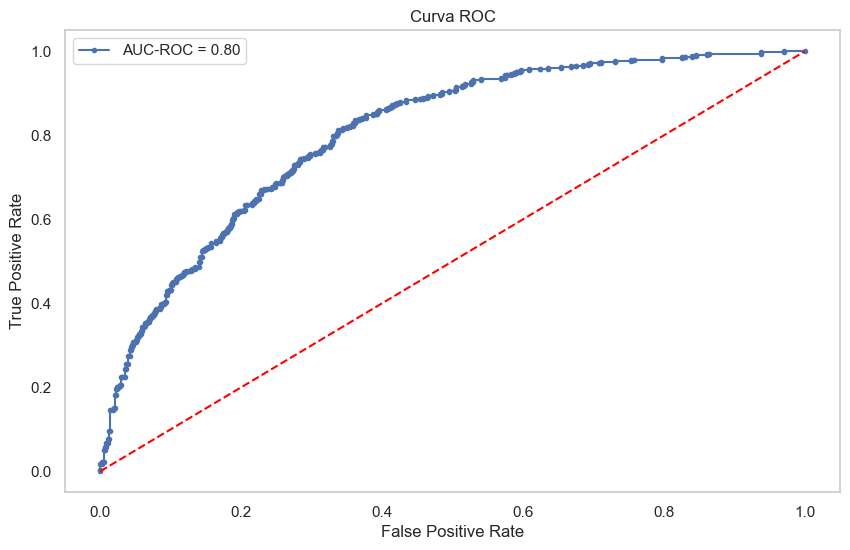

In [335]:
# Predecir probabilidades para el conjunto de prueba
y_prob = best_rl_model.predict_proba(X_test)[:, 1] 

# Calcular el AUC-ROC
roc_auc = roc_auc_score(y_test, y_prob)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, marker='.', label='AUC-ROC = {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.grid()
plt.show()


El area bajos la curva ROC nos arrojó un resultado de 0.80 lo que indica que el modelo tiene una buena capacidad de discriminación entre las clases. 

### 5.2. Ajuste de Hiperparámetros para KNN

De igual manera, se realiza un ajuste de hiperparámetros para el modelo KNN, utilizando GridSearchCV para encontrar los mejores hiperparámetros y se entrena el modelo con estos valores.

Utilizaremos los siguientes hiperparámetros para el ajuste:
- **n_neighbors**: Número de vecinos a considerar para la clasificación. Un número más bajo puede llevar a un modelo más sensible al ruido, mientras que un número más alto puede suavizar demasiado la frontera de decisión.
- **weights**: Tipo de ponderación a utilizar. Puede ser 'uniform' (todos los vecinos tienen el mismo peso) o 'distance' (los vecinos más cercanos tienen más peso). La ponderación por distancia puede mejorar la precisión en algunos casos.
- **leaf_size**: Tamaño de las hojas en el árbol. Un tamaño más pequeño puede llevar a un modelo más complejo, mientras que un tamaño más grande puede llevar a un modelo más simple.

In [336]:
# Prueba de hiperparámetros con KNN
knn = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': range(1, 25),  # Probar con 1 a 20 vecinos
    'weights': ['uniform', 'distance'],
    'leaf_size': [10, 20, 30],
}

# Configuración de GridSearchCV para KNN
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1, verbose=1, return_train_score=True)

# Entrenamiento
grid_search_knn.fit(X_train, y_train)

knn_results = pd.DataFrame(grid_search_knn.cv_results_)

# Mejor combinación de hiperparámetros para KNN
print("Best Parameters for KNN:", grid_search_knn.best_params_)

# Evaluación con el mejor modelo KNN
best_knn_model = grid_search_knn.best_estimator_
best_knn_model.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters for KNN: {'leaf_size': 10, 'n_neighbors': 12, 'weights': 'distance'}


KNeighborsClassifier(leaf_size=10, n_neighbors=12, weights='distance')

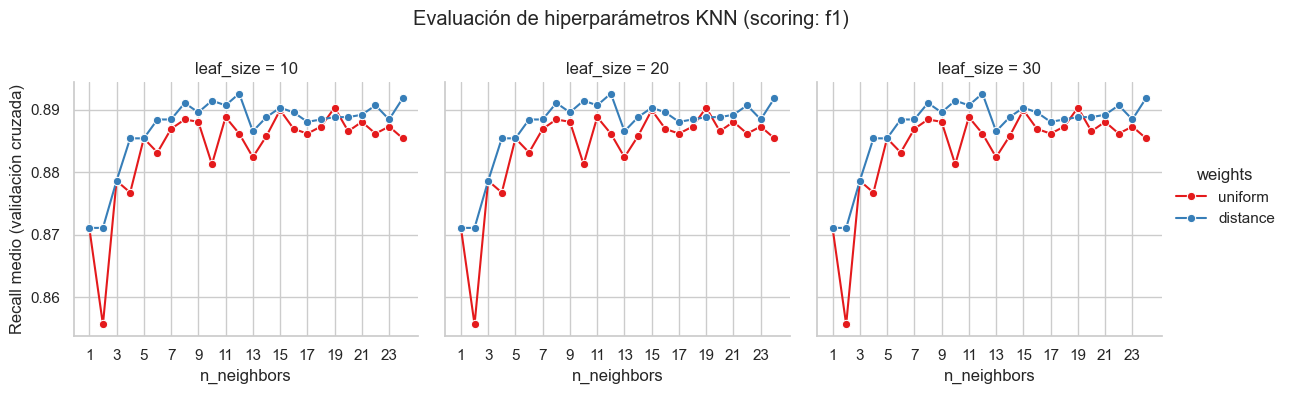

In [337]:

# Asegurar que los valores están en el tipo correcto
knn_results['param_n_neighbors'] = knn_results['param_n_neighbors'].astype(int)
knn_results['param_leaf_size'] = knn_results['param_leaf_size'].astype(int)

# Crear FacetGrid: uno por cada leaf_size
g = sns.FacetGrid(
    knn_results,
    col='param_leaf_size',
    hue='param_weights',
    col_wrap=3,
    height=4,
    sharey=True,
    palette='Set1'
)

# Gráfico de líneas en cada panel
g.map(sns.lineplot, 'param_n_neighbors', 'mean_test_score', marker='o')
g.set(xticks=range(knn_results['param_n_neighbors'].min(), knn_results['param_n_neighbors'].max() + 1, 2))

# Títulos y leyenda
g.set_titles('leaf_size = {col_name}')
g.set_axis_labels('n_neighbors', 'Recall medio (validación cruzada)')
g.add_legend(title='weights')
plt.subplots_adjust(top=0.8)
g.figure.suptitle('Evaluación de hiperparámetros KNN (scoring: f1)')

plt.show()

En este caso el GridSearchCV nos dio como resultado los siguientes hiperparámetros:
- **n_neighbors**: 12
- **weights**: distance
- **leaf_size**: 10

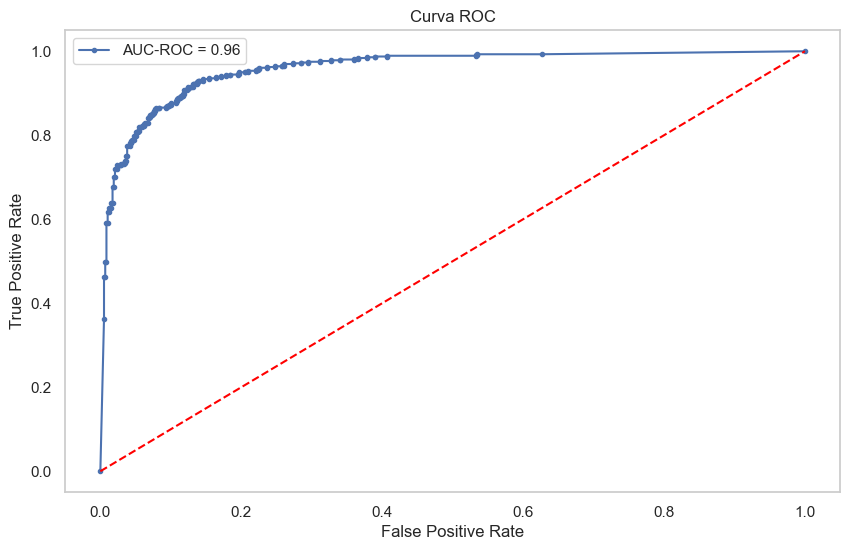

In [338]:
# Predecir probabilidades para el conjunto de prueba
y_prob = best_knn_model.predict_proba(X_test)[:, 1] 

# Calcular el AUC-ROC
roc_auc = roc_auc_score(y_test, y_prob)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, marker='.', label='AUC-ROC = {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.grid()
plt.show()

El area bajos la curva ROC nos arrojó un resultado de 0.96, subiendo un mejor desempeño que el modelo de regresión logística. 

## 6 Evaluación de los Modelos 

In [339]:
X_raw = data_copy.drop('Quality', axis=1)
y_raw = data_copy["Quality"]

# Dividir el dataset en entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, test_size=0.3, random_state=42, stratify=y_raw)

# Entrenar el modelo de regresión logística
rl_model_raw = LogisticRegression(max_iter=1000)
rl_model_raw.fit(X_train_raw, y_train_raw)


knn_model_raw = KNeighborsClassifier(n_neighbors=5)
knn_model_raw.fit(X_train_raw, y_train_raw)


KNeighborsClassifier()

Evaluación del modelo de regresión logística (sin escalar):
📊 Evaluación
--------------------------------
✅ Precisión (Precision):     0.73
🔁 Sensibilidad (Recall):     0.78
🎯 F1-Score:                  0.75

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       599
           1       0.73      0.78      0.75       601

    accuracy                           0.74      1200
   macro avg       0.75      0.74      0.74      1200
weighted avg       0.75      0.74      0.74      1200

--------------------------------
🧮 Matriz de Confusión:


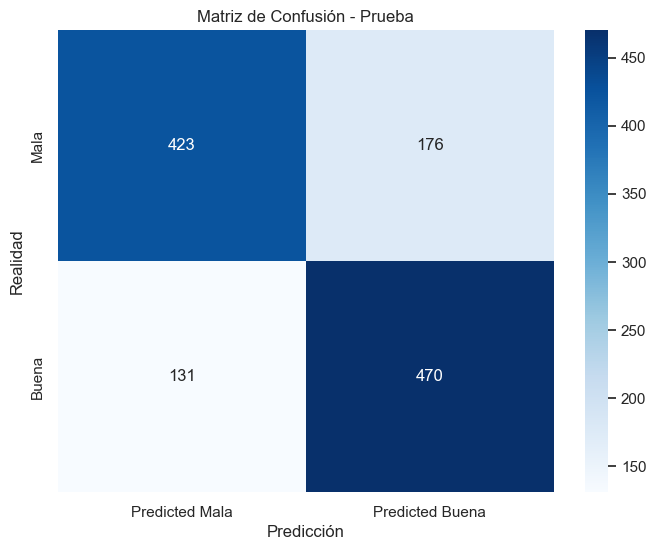

Evaluación del modelo de regresión logística (mejorado):
📊 Evaluación
--------------------------------
✅ Precisión (Precision):     0.68
🔁 Sensibilidad (Recall):     0.85
🎯 F1-Score:                  0.75

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.61      0.70       578
           1       0.68      0.85      0.75       559

    accuracy                           0.73      1137
   macro avg       0.74      0.73      0.73      1137
weighted avg       0.74      0.73      0.72      1137

--------------------------------
🧮 Matriz de Confusión:


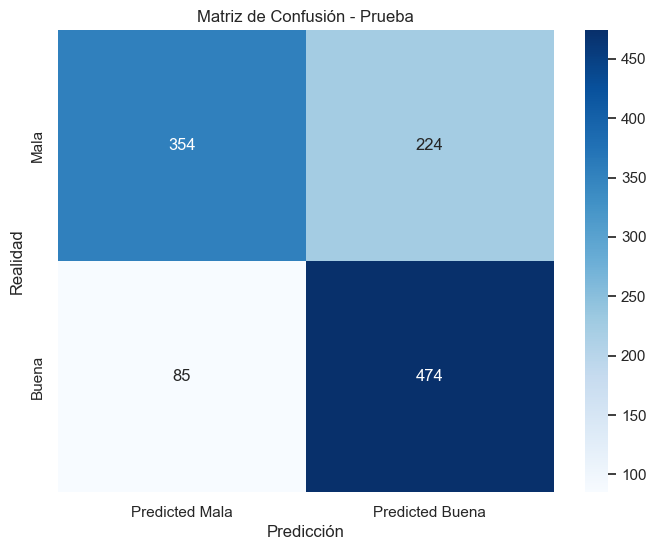

Evaluación del modelo KNN (sin escalar):
📊 Evaluación
--------------------------------
✅ Precisión (Precision):     0.54
🔁 Sensibilidad (Recall):     0.51
🎯 F1-Score:                  0.52

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.55      0.54       599
           1       0.54      0.51      0.52       601

    accuracy                           0.53      1200
   macro avg       0.53      0.53      0.53      1200
weighted avg       0.53      0.53      0.53      1200

--------------------------------
🧮 Matriz de Confusión:


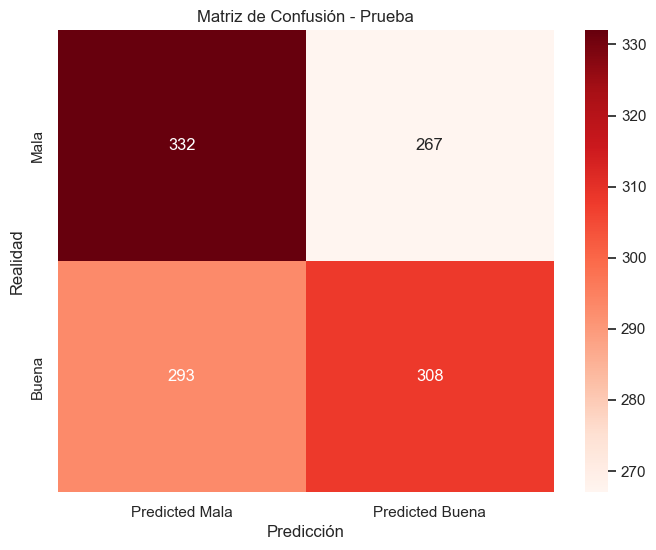

Evaluación del modelo KNN (mejorado):
📊 Evaluación
--------------------------------
✅ Precisión (Precision):     0.88
🔁 Sensibilidad (Recall):     0.91
🎯 F1-Score:                  0.89

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       578
           1       0.88      0.91      0.89       559

    accuracy                           0.89      1137
   macro avg       0.89      0.89      0.89      1137
weighted avg       0.89      0.89      0.89      1137

--------------------------------
🧮 Matriz de Confusión:


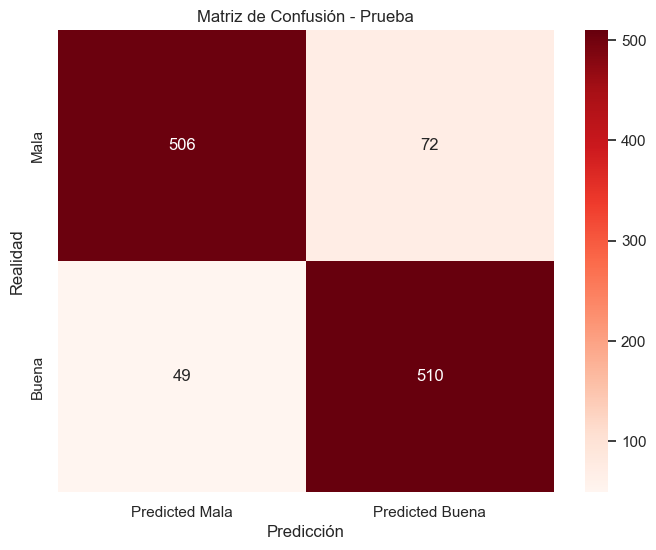

In [340]:
# Comparar el rendimiento de los modelos con datos sin escalar con los mejores modelos
print("Evaluación del modelo de regresión logística (sin escalar):")
evaluate_model(X_test_raw, y_test_raw, rl_model_raw, cmap='Blues')
print("Evaluación del modelo de regresión logística (mejorado):")
evaluate_model(X_test, y_test, best_rl_model, best_threshold, cmap='Blues')
print("Evaluación del modelo KNN (sin escalar):")
evaluate_model(X_test_raw, y_test_raw, knn_model_raw, cmap='Reds')
print("Evaluación del modelo KNN (mejorado):")
evaluate_model(X_test, y_test, best_knn_model, cmap='Reds')


En el caso de la regresión logística, el modelo tiene un buen desempeño, pero no es el mejor modelo para este dataset. El modelo de KNN tiene un mejor desempeño y es el que se recomienda utilizar para este dataset. Asimismo, comparando los modelos con sus respectivas versiones sin modificar, se observa que la regresión logística tiene un desempeño casi igual al modelo sin modificar, mientras que el modelo de KNN tiene un desempeño mucho mejor que el modelo sin modificar. Esto indica que los modelos están bien ajustados y son capaces de predecir la calidad de la manzana con buena efectividad.